# HW 2: Wrangling

In [67]:
!git clone https://github.com/kierstenbruns-lab/wrangling.git

fatal: destination path 'wrangling' already exists and is not an empty directory.


In [68]:
import pandas as pd

airbnb = pd.read_csv("wrangling/assignment/data/airbnb_hw.csv")
mn = pd.read_csv("wrangling/assignment/data/mn_police_use_of_force.csv")

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [69]:
airbnb["Price_clean"] = airbnb["Price"].astype(str)

airbnb["Price_clean"] = airbnb["Price_clean"].str.replace(",", "", regex=False)

airbnb["Price_clean"] = pd.to_numeric(
    airbnb["Price_clean"],
    errors="coerce"
)

airbnb["Price_clean"].isna().sum()

np.int64(0)

1. I chose to remove the commas from the price column. This is so each one could be moved from string values to being numeric. It says I have 0 missing values after cleaning.

In [70]:
mn["subject_injury_clean"] = (
    mn["subject_injury"]
    .astype(str)
    .str.strip()
    .str.lower()
    .map({
        "yes": "Yes",
        "y": "Yes",
        "true": "Yes",
        "no": "No",
        "n": "No",
        "false": "No"
    })
)


mn["subject_injury_clean"].isna().mean()

np.float64(0.7619342359767892)

2. There is a 0.76 proportion of
missing values. This is concerning because data is missing and missing data does not necessarily mean there was no injury.

In [71]:
pd.crosstab(
    mn["force_type"],
    mn["subject_injury_clean"],
    dropna=False
)

subject_injury_clean,No,Yes,NaN
force_type,,,
Baton,0,2,2
Bodily Force,1093,1286,7051
Chemical Irritant,131,41,1421
Firearm,2,0,0
Gun Point Display,33,44,27
Improvised Weapon,34,40,74
Less Lethal,0,0,87
Less Lethal Projectile,1,2,0
Maximal Restraint Technique,0,0,170


2. The missing data is not even across all force types. Bodily force and chemical irritants are most likely to have missing values. This means the missing values are not random and may create a bias in the data.

In [72]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [73]:
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.columns, '\n')

(22986, 709) 

InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object 

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArr

In [80]:
import numpy as np

df["WhetherDefendantWasReleasedPretrial_clean"] = (
    df["WhetherDefendantWasReleasedPretrial"]
    .replace({
        1: 1, 0: 0,
        "Yes": 1, "No": 0
    })
)

df["WhetherDefendantWasReleasedPretrial_clean"] = (
    df["WhetherDefendantWasReleasedPretrial_clean"]
    .where(
        df["WhetherDefendantWasReleasedPretrial_clean"].isin([0, 1]),
        np.nan
    )
)

# Now that the column exists, proceed with further cleaning and analysis
var = "WhetherDefendantWasReleasedPretrial_clean"
print(df[var].unique(), '\n')
df[var] = df[var].replace( [9,99], np.nan) # Notice the list
print(df[var].value_counts())

[nan  0.  1.] 

WhetherDefendantWasReleasedPretrial_clean
1.0    19154
0.0     3801
Name: count, dtype: int64


In [79]:
import numpy as np

df["WhetherDefendantWasReleasedPretrial_clean"] = (
    df["WhetherDefendantWasReleasedPretrial"]
    .replace({
        1: 1, 0: 0,
        "Yes": 1, "No": 0
    })
)

df["WhetherDefendantWasReleasedPretrial_clean"] = (
    df["WhetherDefendantWasReleasedPretrial_clean"]
    .where(
        df["WhetherDefendantWasReleasedPretrial_clean"].isin([0, 1]),
        np.nan
    )
)

In [78]:
df["ImposedSentenceAllChargeInContactEvent_clean"] = pd.to_numeric(
    df["ImposedSentenceAllChargeInContactEvent"],
    errors="coerce"
)

mask_no_sentence = df[
    "SentenceTypeAllChargesAtConvictionInContactEvent"
].isin([
    "Dismissed",
    "Not Guilty",
    "No Conviction"
])

df.loc[
    mask_no_sentence,
    "ImposedSentenceAllChargeInContactEvent_clean"
] = np.nan

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [76]:
import pandas as pd

sharks = pd.read_excel("GSAF5.xls")

In [77]:
sharks = sharks.dropna(axis=1, how="all")


In [81]:
sharks["Year_clean"] = pd.to_numeric(
    sharks["Year"], errors="coerce"
)

In [82]:
sharks["Year_clean"].min(), sharks["Year_clean"].max()

(0.0, 2026.0)

The range goes from 0 to present because as the data gets older, the years have values of 0.

<Axes: xlabel='Year_clean'>

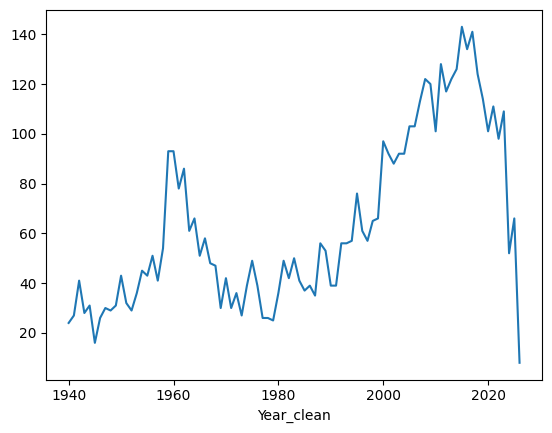

In [83]:
sharks_recent = sharks[sharks["Year_clean"] >= 1940]

attacks_by_year = sharks_recent.groupby("Year_clean").size()

attacks_by_year.plot()

The attacks seemed to be increasing until around 2020, then there was a drop off.

<Axes: >

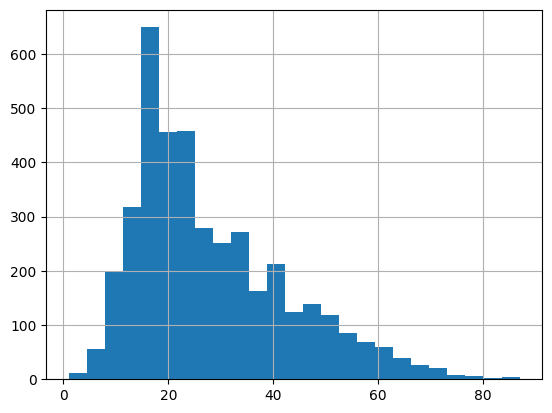

In [84]:
sharks["Age_clean"] = (
    sharks["Age"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

sharks["Age_clean"].hist(bins=25)

Most victims are in their teens.

In [85]:
sharks["Sex_clean"] = (
    sharks["Sex"]
    .str.upper()
    .where(lambda x: x.isin(["M", "F"]))
)
(sharks["Sex_clean"] == "M").mean()

np.float64(0.8021216407355021)

80 percent of the victims are male.

In [94]:
def clean_type(x):
    if pd.isna(x):
        return "Unknown"
    x = x.lower()
    if "unprovoked" in x:
        return "Unprovoked"
    if "provoked" in x:
        return "Provoked"
    return "Unknown"

sharks["Type_clean"] = sharks["Type"].apply(clean_type)

(sharks["Type_clean"] == "Unprovoked").mean()

np.float64(0.7386138613861386)

73 percent of the attacks are unprovoked.

In [87]:
sharks["Fatal_clean"] = (
    sharks["Fatal Y/N"]
    .str.upper()
    .where(lambda x: x.isin(["Y", "N"]), "Unknown")
)

In [88]:

pd.crosstab(
    sharks["Sex_clean"],
    sharks["Type_clean"],
    normalize="index"
)


Type_clean,Provoked,Unknown
Sex_clean,,
F,0.886139,0.113861
M,0.866514,0.133486


Men are more likely to be attacked unprovoked.

In [89]:
pd.crosstab(
    sharks["Type_clean"],
    sharks["Fatal_clean"],
    normalize="index"
)

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.764064,0.016365,0.219570
Unknown,0.372924,0.460963,0.166113


The attack is more likely to be fatal when it is provoked.

In [90]:
pd.crosstab(
    sharks["Sex_clean"],
    sharks["Fatal_clean"],
    normalize="index"
)

Fatal_clean,N,Unknown,Y
Sex_clean,,,
F,0.757426,0.087871,0.154703
M,0.696879,0.082172,0.220949


The attack is more likely to be fatal when the victim is female.

I do not like sharks, but the number of attacks per year seem small. I don't like the idea of getting attacked by a shark but these numbers don't really increase/decrease the fear I already had of sharks.

In [92]:
sharks["Species_split"] = (
    sharks["Species "]
    .astype(str)
    .str.lower()
    .str.split()
)

In [93]:
white_shark = sharks["Species_split"].apply(
    lambda x: "white" in x
)

white_shark.mean()

np.float64(0.10127298444130127)

10% of shark attacks appear to be by white sharks.

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

This paper is about data tidying, specifically about how to make data cleaning easy and effective.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

It is intended to create a uniform way to tidy data. It wants to create an easier way to facilitate initial exploration and analysis. It aims to lessen the amount of time spent doing the logisitics of data analysis and more time actually tackling the data.


  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

Since we use rows and columns, there are different ways to display the exact same type of data. This means that it may be easy to identify variables within each data set, but you have to spend time identifying how the variables work with eachother.


  4. Read Section 2.2. How does Wickham define values, variables, and observations?

A value is every piece of information in a dataset, and it is typically numbers or strings. Variables are collections of values that share the same underlying attribute. An observation is all of the values measured under the same unit accross all attributes.

  5. How is "Tidy Data" defined in section 2.3?

In order for data to be tidy, each varible must form a column, each observation forms a row, and each type of observational unit forms a table. Tidy data means it is easy for a data scientist to extract the needed variables because it is standardized.  


  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The five most common problems with data sets are:
1. Column headers are values, not variable names
2. Multiple Variables are stored in one column
3. Variables are stored in both rows and columns
4. Multiple types of observational units are stored in the same table
5. A single observational unit is stored in multiple tables.

Table 4 is messy because variables form both the rows and columns, and the column headers are values instead of variable names. To melt the dataset, we have to turn columns into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 displays missing values and the element column is not a variable, it stores other names of variables. Table 12 is tidy because they drop the missing values, and melt it with id, year, month with the column element.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling? **bold text**

If tidy data is only as useful as the tools that work with it, hten tidy tools will be inextricably linked to tidy data. This means it'll be easy to get stuck where changing data structures will not improve workflow. Wickham wants others to build on this framework to develop even better tools. Wickham also wants better framworks to make tasks outside of tidying data easier, like parsing dates and matching similar values.